<a href="https://colab.research.google.com/github/CrAvila/SIG2023/blob/main/TP2/TP2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
!pip install geopandas
!pip install rioxarray
#!pip install esda
!pip install pysal
!pip install contextily
!pip install matplotlib_scalebar
warnings.filterwarnings("ignore")


In [ ]:
import matplotlib.pyplot as plt  # Graphics
from matplotlib import colors
import seaborn  # Graphics
import geopandas  # Spatial data manipulation
import pandas  # Tabular data manipulation
#import rioxarray  # Surface data manipulation
#import xarray  # Surface data manipulation
#from pysal.explore import esda  # Exploratory Spatial analytics
#from pysal.lib import weights  # Spatial weights
import contextily  # Background tiles
from matplotlib_scalebar.scalebar import ScaleBar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
lads = geopandas.read_file(
    "https://raw.githubusercontent.com/MetziLuna/Datos_SV/main/Crimen/HR2018.geojson"
).set_index("fid").to_crs(32619)

In [ ]:
db = (geopandas.GeoDataFrame(lads))
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 262 entries, 1 to 271
Data columns (total 76 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   NOM_DPTO                             262 non-null    object  
 1   COD_DPTO                             262 non-null    object  
 2   NOM_MUN                              262 non-null    object  
 3   COD_MUN                              262 non-null    object  
 4   COD_MUN4                             262 non-null    object  
 5   TASA_POBR                            262 non-null    float64 
 6   POBR_FISDL                           262 non-null    object  
 7   POB_TOTAL                            262 non-null    int64   
 8   POB_HOMB                             262 non-null    int64   
 9   POB_MUJER                            262 non-null    int64   
 10  densidad                             262 non-null    int64   
 11  _dig_POB_20

In [ ]:
db["POBR_FISDL"] = db["POBR_FISDL"].replace("Pobreza Baja", "1 - Pobreza Baja")
db["POBR_FISDL"] = db["POBR_FISDL"].replace("Pobreza Moderada", "2 - Pobreza Moderada")
db["POBR_FISDL"] = db["POBR_FISDL"].replace("Pobreza Alta", "3 - Pobreza Alta")
db["POBR_FISDL"] = db["POBR_FISDL"].replace("Pobreza Severa", "4 - Pobreza Severa")

In [ ]:
scalebar = ScaleBar(
        dx = 1,
        units="m",
        dimension="si-length",
        label=None,
        length_fraction=0.25,
        height_fraction=None,
        width_fraction=None,
        location="lower left",
        pad=None,
        border_pad=2,
        sep=None,
        frameon=None,
        color=None,
        box_color=None,
        box_alpha=0.0,
        scale_loc=None,
        label_loc=None,
        font_properties=None,
        label_formatter=None,
        scale_formatter=None,
        fixed_value=None,
        fixed_units=None,
        animated=False,
        rotation='horizontal',
    )

Text(0.9, 0.8, 'N')

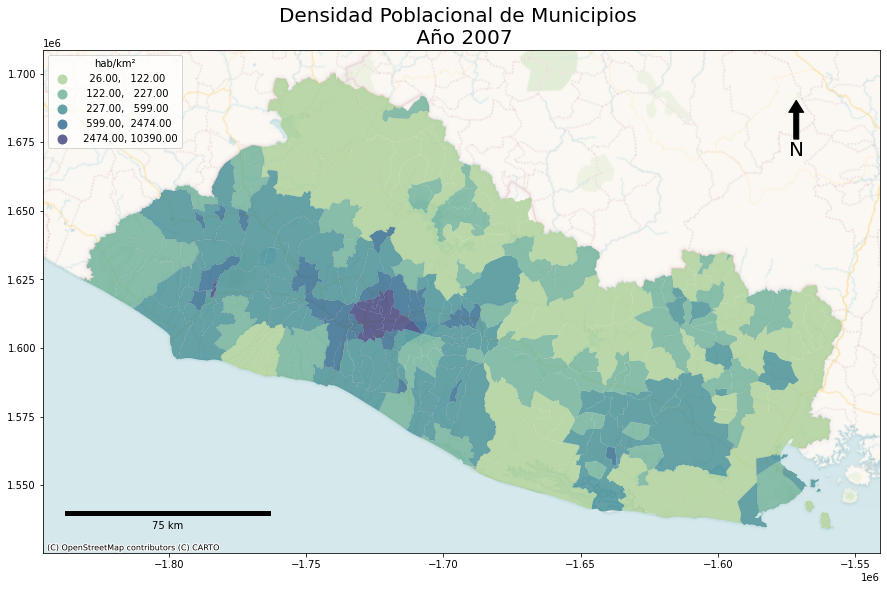

In [ ]:
# Set up figure and a single axis
f, ax = plt.subplots(1, figsize=(15, 15))
# Build choropleth
db.plot(
    column="densidad",
    cmap="crest",
    scheme="JenksCaspall",
    edgecolor="white",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=ax,
)


# Add basemap
contextily.add_basemap(
    ax,
    crs=db.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)
# Remove axes
#ax.set_axis_off();
ax.add_artist(scalebar)
ax.get_legend().set_title("hab/km²")
ax.set_title("Densidad Poblacional de Municipios \n Año 2007", 
    {'fontsize': 20,
                'fontweight' : 80,
                'verticalalignment': 'baseline',
                'horizontalalignment': 'center'},
 x=0.5)

x, y, arrow_length = 0.9, 0.9, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=ax.transAxes)

Text(0.9, 0.8, 'N')

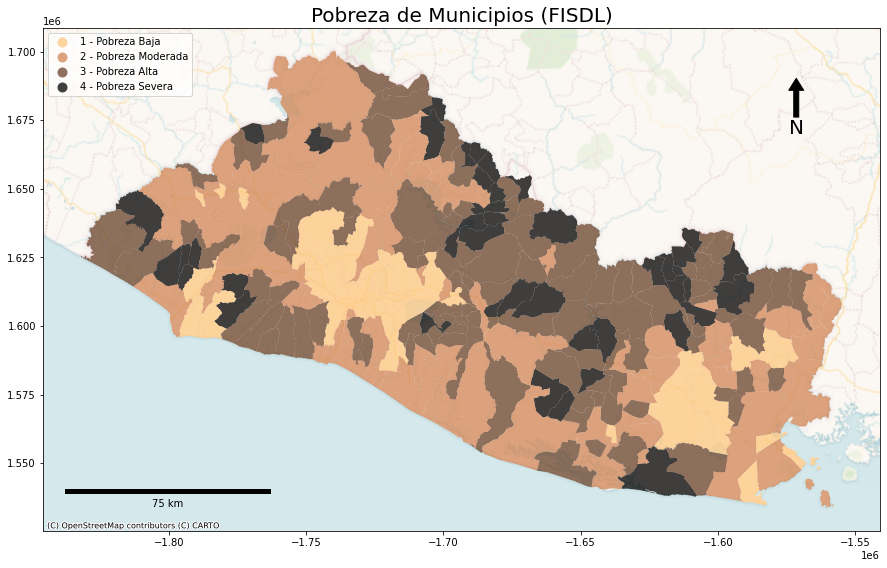

In [ ]:

clusdict={1: 'Pobreza Baja', 2: 'Pobreza Moderada', 3: 'Pobreza Alta', 0: 'Pobreza Severa'}

scalebar2 = ScaleBar(
        dx = 1,
        units="m",
        dimension="si-length",
        label=None,
        length_fraction=0.25,
        height_fraction=None,
        width_fraction=None,
        location="lower left",
        pad=None,
        border_pad=2,
        sep=None,
        frameon=None,
        color=None,
        box_color=None,
        box_alpha=0.0,
        scale_loc=None,
        label_loc=None,
        font_properties=None,
        label_formatter=None,
        scale_formatter=None,
        fixed_value=None,
        fixed_units=None,
        animated=False,
        rotation='horizontal',
    )

# Set up figure and a single axis
f2, bx = plt.subplots(1, figsize=(15, 15))
# Build choropleth
db.plot(
    column="POBR_FISDL",
    cmap="copper_r",
    linewidth=0.0,
    alpha=0.75,
    legend=True,
    legend_kwds=dict(loc=2),
    ax=bx,
)


# Add basemap
contextily.add_basemap(
    bx,
    crs=db.crs,
    source=contextily.providers.CartoDB.VoyagerNoLabels,
)
# Remove axes
#ax.set_axis_off();
bx.add_artist(scalebar2)
bx.set_title("Pobreza de Municipios (FISDL)", 
    {'fontsize': 20,
                'fontweight' : 80,
                'verticalalignment': 'baseline',
                'horizontalalignment': 'center'},
 x=0.5)



x, y, arrow_length = 0.9, 0.9, 0.1
bx.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20,
            xycoords=bx.transAxes)

As in the previous chapter, we require a spatial weights matrix to implement our statistic. Here, we will use eight nearest neighbors for the sake of the example, but the discussion in the earlier chapter on weights applies in this context, and other criteria would be valid too. We also row-standardize them:


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


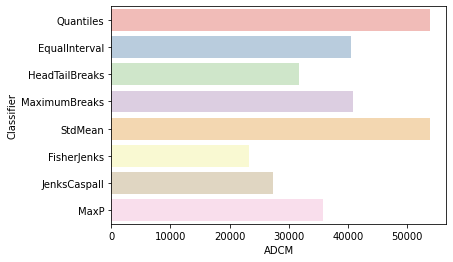

In [ ]:
!pip install mapclassify
import mapclassify
import numpy

c = 7

#Intervalos iguales
ei5 = mapclassify.EqualInterval(db["densidad"], k=c)
ei5
#Cuantiles
q5 = mapclassify.Quantiles(db.densidad, k=c)
q5
#Mean standard deviation
msd = mapclassify.StdMean(db["densidad"])
msd

mb5 = mapclassify.MaximumBreaks(db["densidad"], k=c)
mb5
#Boxplot
bp = mapclassify.BoxPlot(db["densidad"])
bp

ht = mapclassify.HeadTailBreaks(db["densidad"])
ht
#Jenks caspall
numpy.random.seed(12345)
jc5 = mapclassify.JenksCaspall(db["densidad"], k=c)
jc5
#FisherJenks
numpy.random.seed(12345)
fj5 = mapclassify.FisherJenks(db["densidad"], k=c)
fj5

mp5 = mapclassify.MaxP(db["densidad"], k=c)
mp5
# Bunch classifier objects
class5 = q5, ei5, ht, mb5, msd, fj5, jc5, mp5
#print(class5)
# Collect ADCM for each classifier
fits = numpy.array([c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pandas.DataFrame(fits)
# Add classifier names
adcms["classifier"] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ["ADCM", "Classifier"]
ax = seaborn.barplot(
    y="Classifier", x="ADCM", data=adcms, palette="Pastel1"
)

In [ ]:
#print(fits)
#print(adcms)
print(class5)
#print(q5)

(Quantiles

      Interval         Count
----------------------------
[   26.00,    81.57] |    38
(   81.57,   114.00] |    39
(  114.00,   158.00] |    36
(  158.00,   225.14] |    37
(  225.14,   289.43] |    37
(  289.43,   521.14] |    37
(  521.14, 10390.00] |    38, EqualInterval

      Interval         Count
----------------------------
[   26.00,  1506.57] |   250
( 1506.57,  2987.14] |     4
( 2987.14,  4467.71] |     5
( 4467.71,  5948.29] |     0
( 5948.29,  7428.86] |     1
( 7428.86,  8909.43] |     1
( 8909.43, 10390.00] |     1, HeadTailBreaks

      Interval         Count
----------------------------
[   26.00,   448.86] |   218
(  448.86,  1797.18] |    33
( 1797.18,  4826.55] |     8
( 4826.55,  8563.00] |     2
( 8563.00, 10390.00] |     1, MaximumBreaks

      Interval         Count
----------------------------
[   26.00,  2150.00] |   252
( 2150.00,  3283.50] |     2
( 3283.50,  4157.00] |     3
( 4157.00,  5839.50] |     2
( 5839.50,  7649.50] |     1
( 7649.50, 

In [ ]:
# Append class values as a separate column
db["Quantiles"] = q5.yb
db["Equal Interval"] = ei5.yb
db["Head-Tail Breaks"] = ht.yb
db["Maximum Breaks"] = mb5.yb
db["Mean-Standard Deviation"] = msd.yb
db["Fisher-Jenks"] = fj5.yb
db["Jenks Caspall"] = jc5.yb
db["MaxP"] = mp5.yb

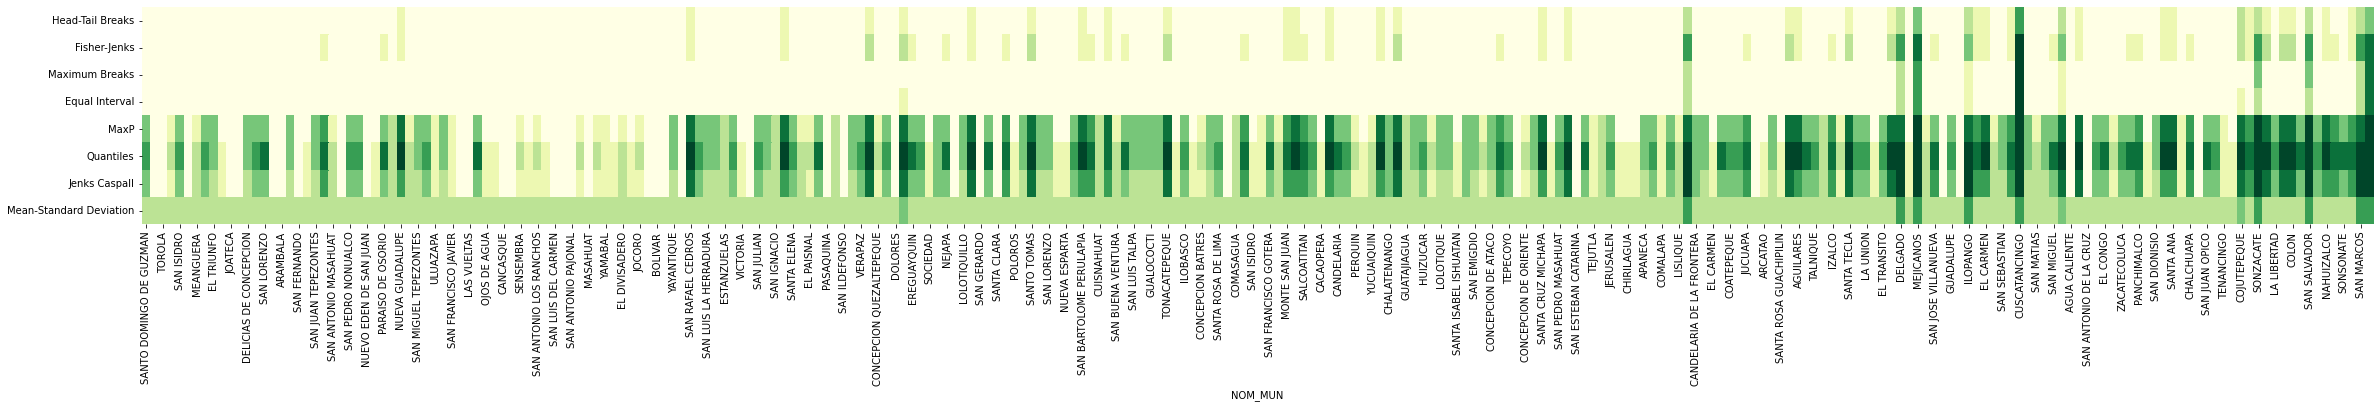

In [ ]:
f, ax = plt.subplots(1, figsize=(40, 4))
seaborn.heatmap(
    db.set_index("NOM_MUN")
    .sort_values("HR2018")[
        [
            "Head-Tail Breaks",
            "Fisher-Jenks",
            "Maximum Breaks",
            "Equal Interval",
            "MaxP",
            "Quantiles",
            "Jenks Caspall",
            "Mean-Standard Deviation",
        ]
    ]
    .T,
    cmap="YlGn",
    cbar=False,
    ax=ax,
)
ax.set_xlabel("NOM_MUN");